# DATA PREPROCESSING

In [66]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
hotel_df = pd.read_csv('hotel_bookings_data.csv')

In [3]:
hotel_df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
32460,Resort Hotel,0,43,2019,March,3,21,2,5,2,...,0,No Deposit,314.0,NaN,0,Personal,33.60,0,1,Check-Out
64221,City Hotel,1,203,2019,May,9,2,0,3,2,...,0,No Deposit,7.0,NaN,0,Personal,60.98,0,1,Canceled
70558,City Hotel,1,91,2019,August,25,18,2,1,2,...,0,No Deposit,9.0,NaN,0,Personal,126.00,0,0,Canceled
12786,Resort Hotel,1,21,2019,September,29,17,1,3,2,...,0,No Deposit,240.0,NaN,0,Personal,230.00,0,1,Canceled
21071,Resort Hotel,0,13,2018,April,8,15,1,2,2,...,0,No Deposit,250.0,NaN,0,Personal,45.00,0,0,Check-Out


## Data Exploration

In [4]:
# Mengecek jumlah baris dan kolom
hotel_df.shape

(119390, 29)

In [5]:
# Mengecek info dataset
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Terdapat total 29 kolom pada dataset yang digunakan. Berikut adalah daftar kolom beserta keterangannya:

1. `hotel`: Nama hotel.
2. `is_canceled`: Apakah pemesanan dibatalkan (1) atau tidak (0).
3. `lead_time`: Jarak hari antara tanggal pemesanan hingga tanggal kedatangan tamu/pemesan.
4. `arrival_date_year`: Tahun kedatangan tamu/pemesan.
5. `arrival_date_month`: Bulan kedatangan tamu/pemesan.
6. `arrival_date_week_number`: Minggu ke-n (dalam satu tahun) dari kedatangan tamu/pemesan.
7. `arrival_date_day_of_month`: Hari ke-n (dalam satu bulan) dari kedatangan tamu/pemesan.
8. `stays_in_weekend_nights`: Jumlah malam weekends (Sabtu atau Minggu) tamu/pemesan menginap atau pesan di hotel.
9. `stays_in_weekdays_nights` Jumlah malam weekdays (Senin hingga Jumat) tamu/pemesan menginap atau pesan di hotel.
10. `adults'`: Jumlah tamu dewasa.
11. `children`: Jumlah tamu anak-anak.
12. `babies`: Jumlah tamu bayi.
13. `meal`: Fasilitas makan yang dipilih.
14. `city`: Kota asal tamu/pemesan.
15. `market_segment`: Segmen tamu/pemesan. Istilah "TA" berarti "Travel Agent" dan "TO" berarti "Tour Operators".
16. `distribution_channel`: Kanal distribusi pemesanan. Istilah "TA" berarti "Travel Agent" dan "TO" berarti "Tour Operators".
17. `is_repeated_guest`: Apakah tamu/pemesan adalah pelanggan berulang (1) atau bukan (0).
18. `previous_cancellations`: Jumlah pemesanan sebelumnya yang dibatalkan oleh tamu/pemesan sebelum pemesanan saat ini.
19. `previous_bookings_not_canceled`: Jumlah pemesanan sebelumnya yang tidak dibatalkan oleh tamu/pemesan sebelum pemesanan saat ini.
20. `booking_changes`: Jumlah perubahan yang dilakukan pada pemesanan dari saat pemesanan hingga saat check-in atau pembatalan.
21. `deposit_type`: "No Deposit" – tanpa deposit; "Non Refund" – deposit senilai total biaya menginap; "Refundable" – deposit dengan nilai di bawah total biaya menginap.
22. `agent`: ID agen perjalanan yang melakukan pemesanan.
23. `company`: ID perusahaan/entitas yang melakukan pemesanan atau bertanggung jawab atas pembayaran pemesanan.
24. `days_in_waiting_list`: Jumlah hari pemesanan berada dalam daftar tunggu sebelum dikonfirmasi kepada tamu/pemesan.
25. `customer_type`: Kategori tamu/pemesan.
26. `adr`: Tarif Harian Rata-rata (dihitung dengan membagi jumlah semua transaksi akomodasi dengan total jumlah malam menginap).
27. `required_car_parking_spaces`: Jumlah tempat parkir mobil yang diperlukan oleh tamu/pemesan.
28. `total_of_special_requests`: Jumlah permintaan khusus yang dibuat oleh tamu/pemesan (misalnya, tempat tidur twin atau lantai tinggi).
29. `reservation_status`: Status pemesanan.

Selain meninjau nama-nama kolom, penting untuk memeriksa tipe data yang digunakan untuk masing-masing kolom. Terdapat beberapa tipe data yang perlu diperhatikan karena kurang sesuai dengan representasi sebenarnya.

- `children`: Karena jumlah anak selalu berupa bilangan bulat, tipe data float tidak relevan. Oleh karena itu, kolom ini perlu diubah menjadi tipe data integer.

- `agent` dan `company`: Meskipun kedua kolom ini berisi angka, mereka hanya berfungsi sebagai ID dan tidak akan dioperasikan secara matematis. Oleh karena itu, lebih tepat untuk mengubah tipe data menjadi string. Hal ini akan mempermudah analisis statistik dan memastikan bahwa data ini tidak dianggap sebagai data numerik.

- `is_canceled` dan `is_repeated_guest`: Kedua kolom ini memuat nilai biner, yang dapat diartikan sebagai True atau False. Mengubahnya menjadi tipe data boolean akan membuat analisis statistik lebih mudah dipahami dan memastikan bahwa data ini tidak dianggap sebagai data numerik.

Dengan melakukan penyesuaian (yang akan dilakukan setelah penanganan duplikat dan missing value), tipe data akan lebih konsisten dengan sifat sebenarnya dari data yang direpresentasikan oleh kolom tersebut, memungkinkan analisis yang lebih tepat dan informatif.

## Duplicated Values Handling

In [6]:
# Mengecek jumlah baris data duplikat
print('Jumlah baris duplikat sebelum pengapusan: ' + str(hotel_df.duplicated().sum()))

Jumlah baris duplikat sebelum pengapusan: 33261


In [7]:
# Menghapus baris data duplikat
hotel_df.drop_duplicates(inplace= True)

In [8]:
# Mengecek hasil penghapusan baris data duplikat
print('Jumlah duplikat setelah penghapusan duplikat: ' + str(hotel_df.duplicated().sum()))
print('Jumlah baris setelah penghapusan duplikat: ' + str(hotel_df.shape[0]))

Jumlah duplikat setelah penghapusan duplikat: 0
Jumlah baris setelah penghapusan duplikat: 86129


## Missing Values Handling

In [9]:
# Mengecek kolom yang memiliki null valuespada dataset
hotel_df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_weekdays_nights              0
adults                                0
children                              4
babies                                0
meal                                  0
city                                450
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
booking_changes                       0
deposit_type                          0
agent                             11941
company                           81019
days_in_waiting_list                  0
customer_type                         0


In [10]:
# Mengecek persentase null value terhadap total baris data
null_column = ['children', 'city', 'agent', 'company']

for col in null_column:
    null_percentage = (hotel_df[col].isnull().sum()) / (hotel_df.shape[0]) * 100
    print('Presentase null pada kolom {} : {}'.format(col, null_percentage))

Presentase null pada kolom children : 0.004644196495953744
Presentase null pada kolom city : 0.5224721057947962
Presentase null pada kolom agent : 13.864087589545914
Presentase null pada kolom company : 94.0670389764191


Dapat diamati bahwa terdapat 4 kolom dengan null value. Persentase null value pada `children` dan `city` tergolong rendah, yakni di bawah 1%. Oleh karena itu, saya memutuskan untuk menghapus baris-baris dengan null value pada kedua kolom tersebut. Namun, kolom `agent` memiliki persentase null value yang cukup tinggi, mencapai 13%. Sedangkan, persentase null value pada kolom `company` sangat tinggi, yaitu mencapai 94%. Oleh karena itu, diperlukan analisis lebih lanjut untuk menentukan langkah yang tepat dalam penanganannya.

### `children` & `city` null values handling

In [11]:
# Menghapus null value pada kolom 'children' dan 'city'
hotel_df.dropna(subset= ['children', 'city'], inplace= True)

### `agent` & `company` null values handling

Sebelum menentukan tindakan yang tepat untuk menangani null value pada kolom `agent` dan `company`, mari kita lakukan analisa terlebih dahulu. 

Kedua kolom ini berisi data entitas bisnis yang melakukan pemesanan mewakili tamu. Akan tetapi dalam praktiknya, sangat umum pemesan melakukan pemesanan sebagai individu dan bukan entitas bisnis. Pemesanan semacam ini mungkin terkait dengan orang perorangan yang melakukan pemesanan untuk diri mereka sendiri, mewakili anggota keluarga, atau bahkan dalam konteks grup.

Untuk memverifikasi hal ini, kita dapat melakukan pemeriksaan terhadap kolom `customer_type` untuk memberikan wawasan tentang kategori tamu.

In [12]:
# Grouping kategori tamu/pemesan
hotel_df.groupby('customer_type')['customer_type'].value_counts()

customer_type
Bussiness      535
Contract      3125
Family       10780
Personal     71235
Name: count, dtype: int64

Berdasarkan analisis terhadap kolom `customer_type`, terdapat empat nilai unik yang mewakili berbagai jenis tamu/pemesan. Tampak jelas bahwa kategori "Personal" merupakan yang paling umum, menunjukkan bahwa sebagian besar pemesanan dilakukan oleh individu. Sebaliknya, kategori "Business" mencatatkan jumlah pemesanan yang paling sedikit. Ini menandakan bahwa bisnis atau entitas korporat mungkin tidak terlibat secara signifikan dalam pemesanan di dataset ini. Dalam kasus ini, pemesanan atas nama individu mungkin lebih umum, dan karenanya, ID untuk agen atau perusahaan tidak selalu tercatat.

Berdasarkan hal tersebut di atas, saya memutuskan untuk menambahkan angka 1234 pada kolom `agent` dan `company` untuk mewakili pemesanan yang tidak dilakukan melalui agen atau perusahaan. Pemilihan angka tersebut didasarkan pada nilai ID yang hanya terdiri dari 1 hingga 3 digit angka, sehingga dengan menggunakan 4 digit angka bisa menjadi pembeda dari nilai ID lain.

In [13]:
# Mengisi null value pada kolom 'agent' dan 'company'
hotel_df[['agent', 'company']] = hotel_df[['agent', 'company']].fillna(1234)

In [14]:
# Mengecek hasil setelah missing values handling
hotel_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

## Penyesuaian Tipe Data

Dalam kasus project ini, saya melakukan proses penyesuaian tipe data setelah menangani duplikat dan missing value karena untuk terjadi error ketika akan mengubah tipe data kolom yang memiliki null value.

### `children`: numeric to proper numeric

In [15]:
# Mengubah tipe data kolom 'children' dari float ke integer
hotel_df['children'] = hotel_df['children'].astype(int)

### `agent`, `company`: numeric to string

In [16]:
# Mengubah tipe data kolom 'agent' dan 'company' dari float ke string
hotel_df[['agent', 'company']] = hotel_df[['agent', 'company']].astype(str)

# Menghilangkan nilai desimal dari string
hotel_df['agent'] = hotel_df['agent'].str.rstrip('.0')
hotel_df['company'] = hotel_df['company'].str.rstrip('.0')

### `is_canceled`, `is_repeated_guest`: integer to boolean

In [17]:
# Mengubah tipe data kolom 'is_canceled' dan 'is_repeated_guest' dari integer ke boolean
hotel_df[['is_canceled', 'is_repeated_guest']] = hotel_df[['is_canceled', 'is_repeated_guest']].astype(bool)

In [18]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85675 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           85675 non-null  object 
 1   is_canceled                     85675 non-null  bool   
 2   lead_time                       85675 non-null  int64  
 3   arrival_date_year               85675 non-null  int64  
 4   arrival_date_month              85675 non-null  object 
 5   arrival_date_week_number        85675 non-null  int64  
 6   arrival_date_day_of_month       85675 non-null  int64  
 7   stays_in_weekend_nights         85675 non-null  int64  
 8   stays_in_weekdays_nights        85675 non-null  int64  
 9   adults                          85675 non-null  int64  
 10  children                        85675 non-null  int32  
 11  babies                          85675 non-null  int64  
 12  meal                            8567

## Memastikan konsistensi data kategorikal

Pada proses ini, saya akan melakukan perubahan nilai pada kolom-kolom kategorikal menjadi lowercase. Hal ini bertujuan agar tidak ada nilai yang berbeda yang memiliki arti sama karena perbedaan penggunaan upper/lowercase.

In [19]:
# Membuat list berisi kolom-kolom kategorikal
cat_columns = hotel_df.select_dtypes(include=['object']).columns.tolist()
cat_columns

['hotel',
 'arrival_date_month',
 'meal',
 'city',
 'market_segment',
 'distribution_channel',
 'deposit_type',
 'agent',
 'company',
 'customer_type',
 'reservation_status']

In [20]:
# Mengubah semua nilai pada kolom kategorikal menjadi lowercase
for col in cat_columns:
    hotel_df[col] = hotel_df[col].str.lower()

# Monthly Hotel Booking Analysis Based on Hotel Type

In [21]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,resort hotel,False,342,2017,september,27,1,0,0,2,...,3,no deposit,1234,1234,0,personal,0.0,0,0,check-out
1,resort hotel,False,737,2017,september,27,1,0,0,2,...,4,no deposit,1234,1234,0,personal,0.0,0,0,check-out
2,resort hotel,False,7,2017,september,27,1,0,1,1,...,0,no deposit,1234,1234,0,personal,75.0,0,0,check-out
3,resort hotel,False,13,2017,september,27,1,0,1,1,...,0,no deposit,304,1234,0,personal,75.0,0,0,check-out
4,resort hotel,False,14,2017,september,27,1,0,2,2,...,0,no deposit,24,1234,0,personal,98.0,0,1,check-out


## Grouping dan Agregasi Dataframe

In [51]:
# Grouping dan agregasi jumlah pengunjung berdasarkan hotel, bulan kedatangan, dan tahun kedatangan
monthly_visitor = hotel_df.groupby(['hotel', 'arrival_date_month', 'arrival_date_year'])['reservation_status'].count().reset_index()
monthly_visitor = monthly_visitor.rename(columns= {'arrival_date_month': 'month', 
                                                   'arrival_date_year': 'year',
                                                   'reservation_status': 'number_of_visitors'})

monthly_visitor

,hotel,month,year,number_of_visitors
0,city hotel,april,2018,1631
1,city hotel,april,2019,1929
2,city hotel,august,2018,2224
3,city hotel,august,2019,2703
4,city hotel,december,2017,1456
5,city hotel,december,2018,2602
6,city hotel,february,2017,1003
7,city hotel,february,2018,1979
8,city hotel,january,2017,762
9,city hotel,january,2018,2130


Terlihat bahwa khusus untuk bulan September dan Oktober memiliki 3 nilai tahun, 2017, 2018, dan 2019. Dikarenakan kita hanya akan melihat jumlah pengunjung perbulannya, maka saya akan menggunakan nilai rata-rata jumlah pengunjung perbulannya. Oleh karena itu, perbedaan jumlah tahun pada dataset kita tidak akan berpengaruh besar.

In [58]:
# Menghitung rata-rata jumlah pengunjung perbulannya
avg_monthly_visitor = monthly_visitor.groupby(['hotel', 'month'])['number_of_visitors'].mean().round().reset_index().rename(columns= {'number_of_visitors': 'avg_monthly_visitor'})
avg_monthly_visitor

,hotel,month,avg_monthly_visitor
0,city hotel,april,1780.0
1,city hotel,august,2464.0
2,city hotel,december,2029.0
3,city hotel,february,1491.0
4,city hotel,january,1446.0
5,city hotel,july,2672.0
6,city hotel,june,2517.0
7,city hotel,march,1349.0
8,city hotel,may,2410.0
9,city hotel,november,2032.0


Untuk mempermudah dalam membaca data dan melakukan visualisasi, saya akan mengurutkan nilai bulan dengan melakukan mapping angka terlebih dahulu.

In [60]:
# Mapping angka ke nama bulan sesuai urutannya
month_order = {'january': 1, 'february': 2, 'march': 3, 'april': 4, 'may': 5, 'june': 6, 
               'july': 7, 'august': 8, 'september': 9, 'october': 10, 'november': 11, 'december': 12}

avg_monthly_visitor['month_num'] = avg_monthly_visitor['month'].map(month_order)

# Mengurutkan dataframe berdasarkan hotel dan bulan
avg_monthly_visitor = avg_monthly_visitor.sort_values(by=['hotel', 'month_num']).drop('month_num', axis=1)
avg_monthly_visitor

,hotel,month,avg_monthly_visitor
4,city hotel,january,1446.0
3,city hotel,february,1491.0
7,city hotel,march,1349.0
0,city hotel,april,1780.0
8,city hotel,may,2410.0
6,city hotel,june,2517.0
5,city hotel,july,2672.0
1,city hotel,august,2464.0
11,city hotel,september,1895.0
10,city hotel,october,2166.0


## Visualisasi Data

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Jenis grafik yang akan saya gunakan adalah linechart karena kita ingin mengidentifikasi tren serta membandingkan perbedaan nilai dalam periode waktu tertentu. Kita juga bisa membandingkan data dari kedua hotel, resort dan city hotel dalam satu grafik. Namun untuk mempermudah proses visualisasi dan perbandingan, saya akan memisahkan data untuk city hotel dan resort hotel menjadi dua dataframe yang berbeda.

In [63]:
# Memisahkan data hotel
city_hotel_data = avg_monthly_visitor[avg_monthly_visitor['hotel'] == 'city hotel']
resort_hotel_data = avg_monthly_visitor[avg_monthly_visitor['hotel'] == 'resort hotel']

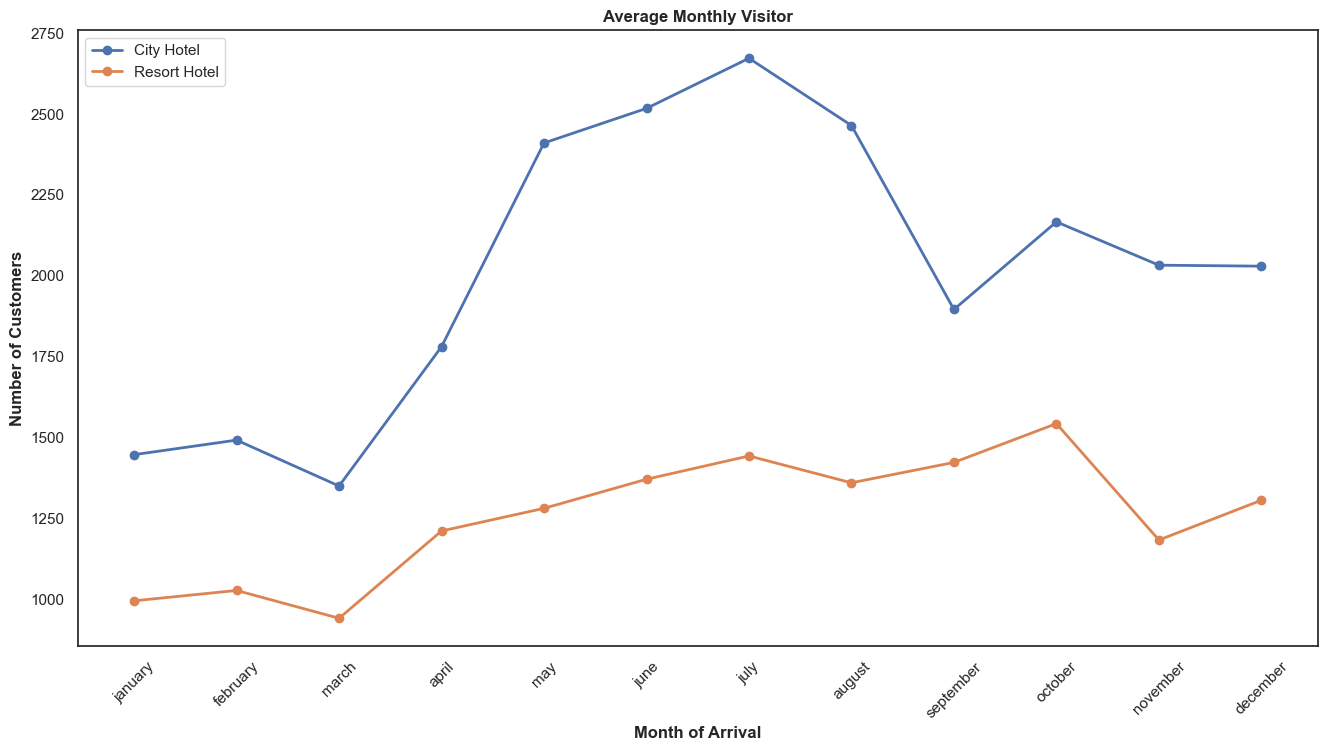

In [91]:
# Visualisasi data pengunjung bulanan
sns.set_style('white')
plt.figure(figsize= (16, 8))
plt.plot(city_hotel_data['month'], city_hotel_data['avg_monthly_visitor'], marker='o', linewidth=2, label='City Hotel')
plt.plot(resort_hotel_data['month'], resort_hotel_data['avg_monthly_visitor'], marker='o', linewidth=2, label='Resort Hotel')
plt.xticks(rotation= 45)
plt.legend(loc= 'upper left')
plt.xlabel('Month of Arrival', fontweight= 'bold')
plt.ylabel('Number of Customers', fontweight= 'bold')
plt.title('Average Monthly Visitor', fontweight= 'bold')
plt.show()